# Reducing Overfitting with Weight Regularization

The penalizing parameters of the network also called weight regularization.

One strategy to combat overfitting NN is by penalyzing the parameters (weight) of the NN such that they are driven to be small values, creating a somplest model less prone to overfit.

l2 Norm penalization.
regularizers = regularizers.l2(0.01) (o.o1 is how much we penalize higher parameter values)

In [1]:
# Load libraries

import numpy as np
from keras import models
from keras import layers
from keras import regularizers
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
# Set random seed

np.random.seed(0)

In [3]:
# Set the number of features we want

number_features = 1000

In [4]:
# Load Data anda target  vector from movie review data

(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words = number_features)

In [5]:
# Convert movie review data to a one hot enconded feature matrix

tokenizer = Tokenizer(num_words = number_features)

features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode= "binary")

In [6]:
# Start NN

network = models.Sequential()

In [7]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=16, activation = "relu", kernel_regularizer = regularizers.l2(0.01), input_shape = (number_features,)))

In [8]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=16, activation = "relu", kernel_regularizer = regularizers.l2(0.01)))

In [9]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=1, activation = "sigmoid"))

In [10]:
# Compile NN

network.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [11]:
# Train NN

history_WR = network.fit(features_train, target_train, epochs = 10, verbose = 1, batch_size = 100, validation_data = (features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 77us/step - loss: 0.6454 - accuracy: 0.8071 - val_loss: 0.4962 - val_accuracy: 0.8523
Epoch 2/10
25000/25000 [==============================] - 1s 46us/step - loss: 0.4694 - accuracy: 0.8550 - val_loss: 0.4517 - val_accuracy: 0.8570
Epoch 3/10
25000/25000 [==============================] - 1s 46us/step - loss: 0.4403 - accuracy: 0.8566 - val_loss: 0.4430 - val_accuracy: 0.8484
Epoch 4/10
25000/25000 [==============================] - 1s 44us/step - loss: 0.4252 - accuracy: 0.8542 - val_loss: 0.4283 - val_accuracy: 0.8517
Epoch 5/10
25000/25000 [==============================] - 1s 43us/step - loss: 0.4131 - accuracy: 0.8583 - val_loss: 0.4316 - val_accuracy: 0.8438
Epoch 6/10
25000/25000 [==============================] - 1s 48us/step - loss: 0.4052 - accuracy: 0.8563 - val_loss: 0.4162 - val_accuracy: 0.8479
Epoch 7/10
25000/25000 [==============================] - 1s 46us/st

In [12]:
# Crearting plots

training_loss_WR = history_WR.history["loss"]

test_loss_WR = history_WR.history["val_loss"]

epoch_count = range(1, len(training_loss_WR) + 1)


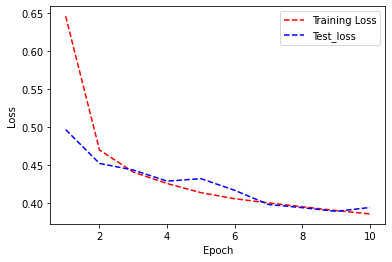

In [13]:
# Visualize loss history

plt.plot(epoch_count, training_loss_WR, "r--")
plt.plot(epoch_count, test_loss_WR, "b--")
plt.legend(["Training Loss", "Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [14]:
# Get training and test accuracy histories 

training_accuracy = history_WR.history["accuracy"]
test_accuracy = history_WR.history["val_accuracy"]

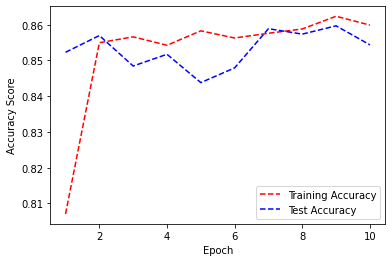

In [15]:
# Visualize the accuracy history 

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

# Reducing Overfitting with Early Stopping

Try stopping training when the test loss stops decreasing.

Early Stopping: One of the most common and very effective methods, to monitor the training and stop it when the test error stars to increase.



monitor = "val_loss", patience = 2 ==> monitor the test validation loss at each epoch and after the test loss has not improved adter two epochs, training is interrumped
moel_checkpoint : Will save the model to a file after every checkpoint bets = True only will save the best model

In [16]:
# Load libraries

import numpy as np
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [17]:
# Set random seed

np.random.seed(0)

In [18]:
# Set the number of features we want

number_features = 1000

In [19]:
# Load Data anda target  vector from movie review data

(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words = number_features)

In [20]:
# Convert movie review data to a one hot enconded feature matrix

tokenizer = Tokenizer(num_words = number_features)

features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode= "binary")

In [21]:
# Start NN

network = models.Sequential()

In [22]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=16, activation = "relu", input_shape = (number_features,)))

In [23]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=16, activation = "relu"))

In [24]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=1, activation = "sigmoid"))

In [25]:
# Compile NN


network.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [26]:
# Set callbacks functions to early stop training and save the model so far

callbacks = [EarlyStopping(monitor = "val_loss", patience = 2), ModelCheckpoint(filepath="best_model.h5",
                                                                                monitor = "val_loss",
                                                                                save_best_only = True)]

In [27]:
# Train NN

history_ES = network.fit(features_train, target_train, epochs = 20, callbacks = callbacks, verbose = 1, batch_size = 100, validation_data = (features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 60us/step - loss: 0.4109 - accuracy: 0.8204 - val_loss: 0.3429 - val_accuracy: 0.8546
Epoch 2/20
25000/25000 [==============================] - 1s 52us/step - loss: 0.3234 - accuracy: 0.8653 - val_loss: 0.3293 - val_accuracy: 0.8610
Epoch 3/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3132 - accuracy: 0.8686 - val_loss: 0.3371 - val_accuracy: 0.8553
Epoch 4/20
25000/25000 [==============================] - 1s 52us/step - loss: 0.3062 - accuracy: 0.8707 - val_loss: 0.3279 - val_accuracy: 0.8592
Epoch 5/20
25000/25000 [==============================] - 1s 51us/step - loss: 0.2966 - accuracy: 0.8754 - val_loss: 0.3397 - val_accuracy: 0.8526
Epoch 6/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2874 - accuracy: 0.8792 - val_loss: 0.3358 - val_accuracy: 0.8548


In [28]:
# Crearting plots

training_loss_ES = history_ES.history["loss"]

test_loss_ES = history_ES.history["val_loss"]

epoch_count = range(1, len(training_loss_ES) + 1)


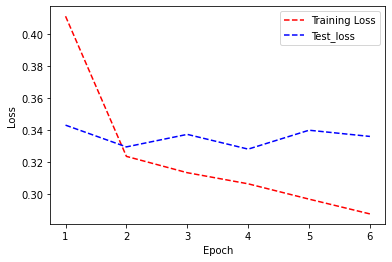

In [29]:
# Visualize loss history

plt.plot(epoch_count, training_loss_ES, "r--")
plt.plot(epoch_count, test_loss_ES, "b--")
plt.legend(["Training Loss", "Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [30]:
# Get training and test accuracy histories 

training_accuracy = history_ES.history["accuracy"]
test_accuracy = history_ES.history["val_accuracy"]

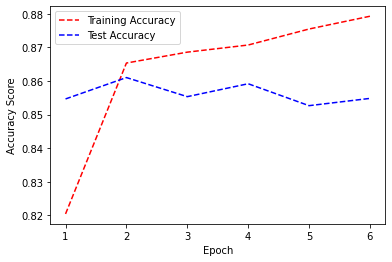

In [31]:
# Visualize the accuracy history 

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

# Reducing Overfitting with DropOut

Introduce noise to your network's architecture using dropout

In [32]:
# Load libraries

import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [33]:
# Set random seed

np.random.seed(0)

In [34]:
# Set the number of features we want

number_features = 1000

In [35]:
# Load Data anda target  vector from movie review data

(data_train, target_train),(data_test, target_test) = imdb.load_data(num_words = number_features)

In [36]:
# Convert movie review data to a one hot enconded feature matrix

tokenizer = Tokenizer(num_words = number_features)

features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode= "binary")

In [37]:
# Start NN

network = models.Sequential()

In [38]:
# Add drop out layer 

network.add(layers.Dropout(0.2, input_shape = (number_features,)))

In [39]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=16, activation = "relu"))

In [40]:
# Add drop out layer for previous hidden layer

network.add(layers.Dropout(0.5))

In [41]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=16, activation = "relu"))

In [42]:
# Add drop out layer for previous hidden layer

network.add(layers.Dropout(0.5))

In [43]:
# Add fully connected layer with a ReLu activation function

network.add(layers.Dense(units=1, activation = "sigmoid"))

In [44]:
# Compile NN


network.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [45]:
# Train NN

history_drop = network.fit(features_train, target_train, epochs = 20, verbose = 1, batch_size = 100, validation_data = (features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.6296 - accuracy: 0.6317 - val_loss: 0.4753 - val_accuracy: 0.8318
Epoch 2/20
25000/25000 [==============================] - 1s 58us/step - loss: 0.5069 - accuracy: 0.7572 - val_loss: 0.3847 - val_accuracy: 0.8512
Epoch 3/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.4555 - accuracy: 0.7991 - val_loss: 0.3588 - val_accuracy: 0.8577
Epoch 4/20
25000/25000 [==============================] - 2s 67us/step - loss: 0.4290 - accuracy: 0.8155 - val_loss: 0.3462 - val_accuracy: 0.8585
Epoch 5/20
25000/25000 [==============================] - 1s 59us/step - loss: 0.4200 - accuracy: 0.8209 - val_loss: 0.3509 - val_accuracy: 0.8578
Epoch 6/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.4132 - accuracy: 0.8243 - val_loss: 0.3330 - val_accuracy: 0.8611
Epoch 7/20
25000/25000 [==============================] - 2s 67us/st

In [46]:
# Crearting plots

training_loss_drop = history_drop.history["loss"]

test_loss_drop = history_drop.history["val_loss"]

epoch_count = range(1, len(training_loss_drop) + 1)


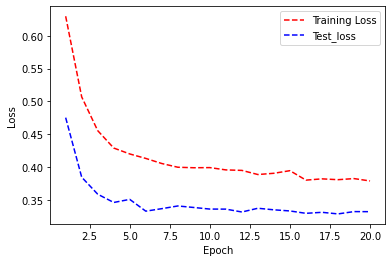

In [47]:
# Visualize loss history

plt.plot(epoch_count, training_loss_drop, "r--")
plt.plot(epoch_count, test_loss_drop, "b--")
plt.legend(["Training Loss", "Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [48]:
# Get training and test accuracy histories 

training_accuracy = history_drop.history["accuracy"]
test_accuracy = history_drop.history["val_accuracy"]

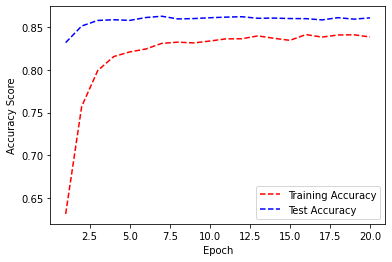

In [49]:
# Visualize the accuracy history 

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()